<b><font size="20" color='white'>Nhóm 01 - House Price Predicting</font></b>
<h1><font size="15" color='white'>Member:</font></h1>
<h2><font size="15" color='white'>Nguyễn Thanh Sang - 20110393</font></h2>
<h2><font size="15" color='white'>Huỳnh Kỳ Sơn</font></h2>
<h2><font size="15" color='white'>Huỳnh Đăng Khoa</font></h2>


<b><font size="25" color='red'>Import libraries</font></b>


In [3]:
# Most important
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# other
import missingno as msno
import os

 <b><font size="25" color='red'>Load The DataSet</font></b>


In [4]:
## Read the Csv file
data = pd.read_csv(".\data\house_dataset\housing.csv")

In [5]:
df_housing=data.copy()

<b><font size="25" color='red'>Inspect The Data</font></b>


In [6]:
# Show the head of the dataFrame 
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
# Check info
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
## Some statistics on data 
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
## check nulls of data 
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df_housing.dropna(inplace=True)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


# Comment

* > Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature 


<b><font size="25" color='red'> Exploratory Data Analysis (EDA)</font></b>


In [11]:
# Explore the column ocean_proximity
ocean_values = df_housing["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

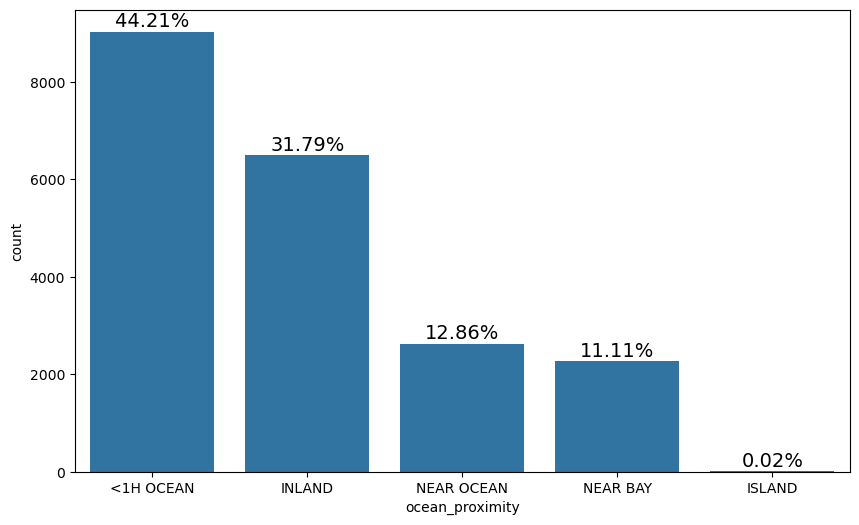

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=df_housing,order=ocean_values.index)

# showing the percentage
for i in range(ocean_values.shape[0]):
    count = ocean_values[i] 
    strt='{:0.2f}%'.format(100*count / df_housing.shape[0]) 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14) 


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

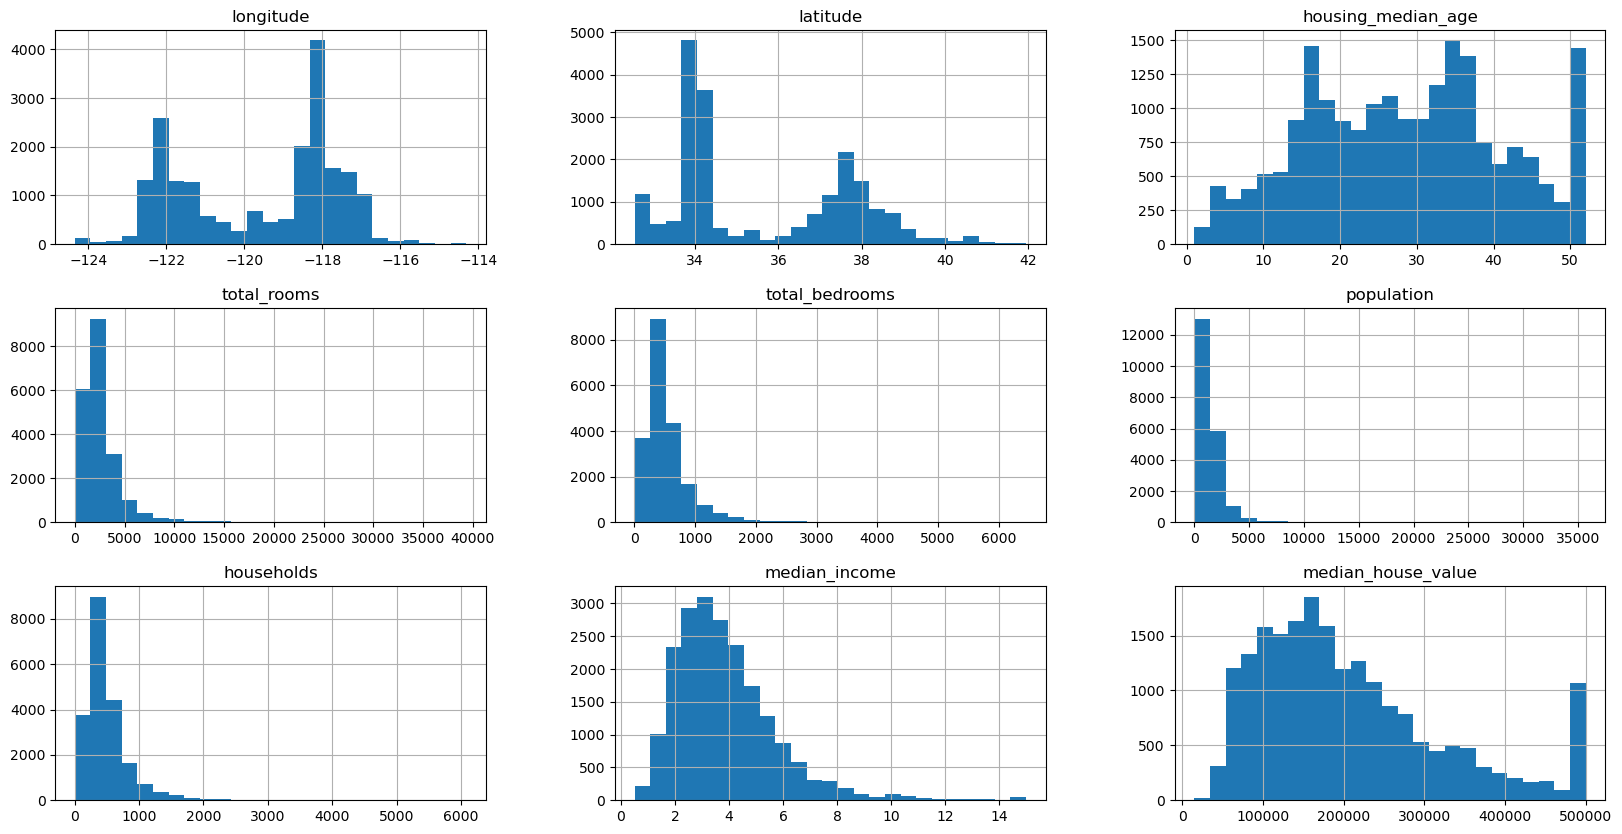

In [13]:
# Histogram
df_housing.hist(bins=25,figsize=(20,10))

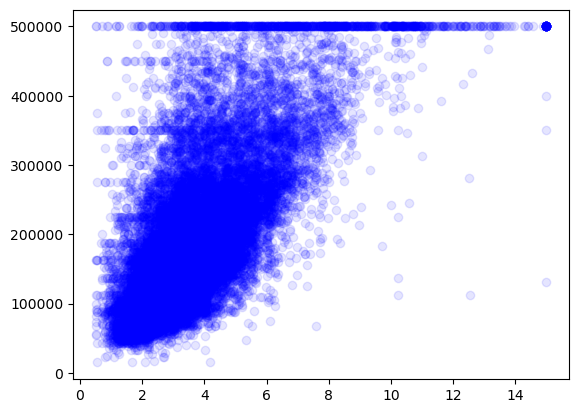

In [14]:
# check scatter plot between median_income and median_house_value
plt.scatter(df_housing["median_income"],df_housing["median_house_value"], alpha=0.1,color="b")

In [15]:
## Try to make median_income into bins
income_bins = pd.cut(df_housing["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])

<Axes: xlabel='median_income', ylabel='count'>

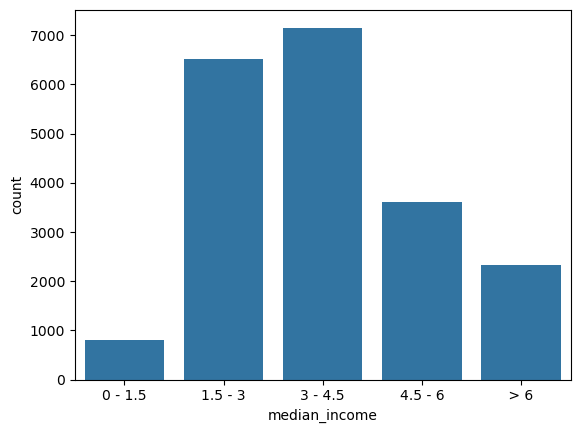

In [16]:
sns.countplot(x = income_bins)

# Comment 
* >  It seems that the (1H ocean) is about the half of the dataset the data is biased to this category.

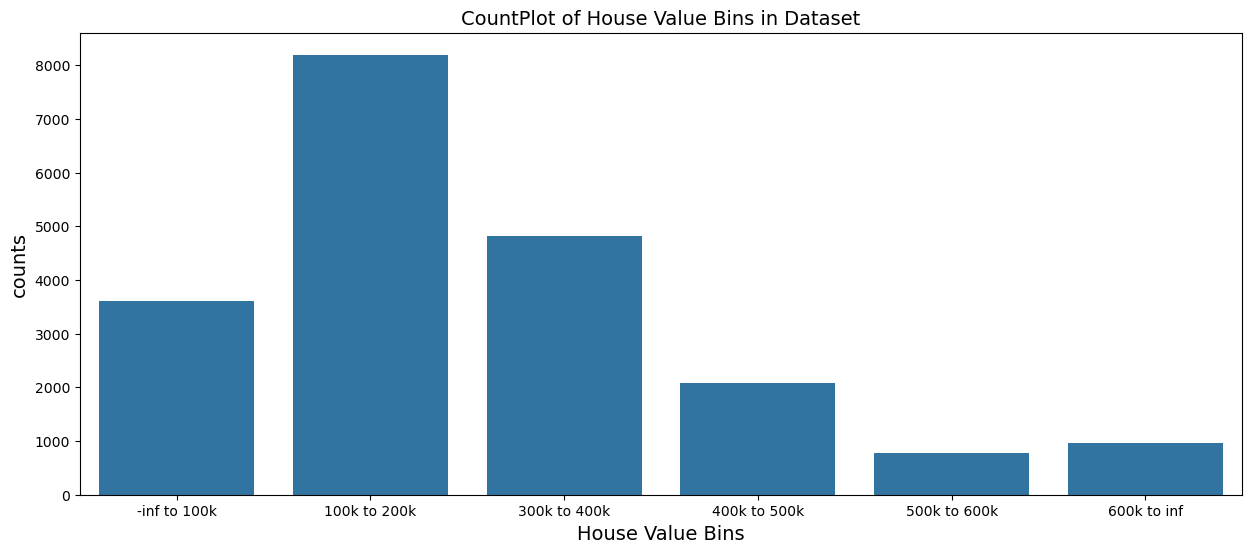

In [17]:
## Try for (median_house_vaLue) to convert it to chunks (bins) 
## Cut this numericaL feature to categorical for its vaLues to be in range will be in the some category 
## In the foLLowing example -- any value between range (0-100k) will be the same category, I name it (0-100k) 

house_value_bins = pd.cut(x=df_housing["median_house_value"],
                          bins=(-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf),
                                labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k to inf') )
## countpLot for the above chunks 
plt.figure(figsize=(15,6)) 
sns.countplot(x=house_value_bins) 
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k') 
plt.xlabel('House Value Bins', fontsize=14, c='k') 
plt.ylabel('counts', fontsize=14,c='k') 
plt.show() 


# Comment

* > The majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical' 

<b><font size="20" color='red'>Bivariate visualization</font></b>


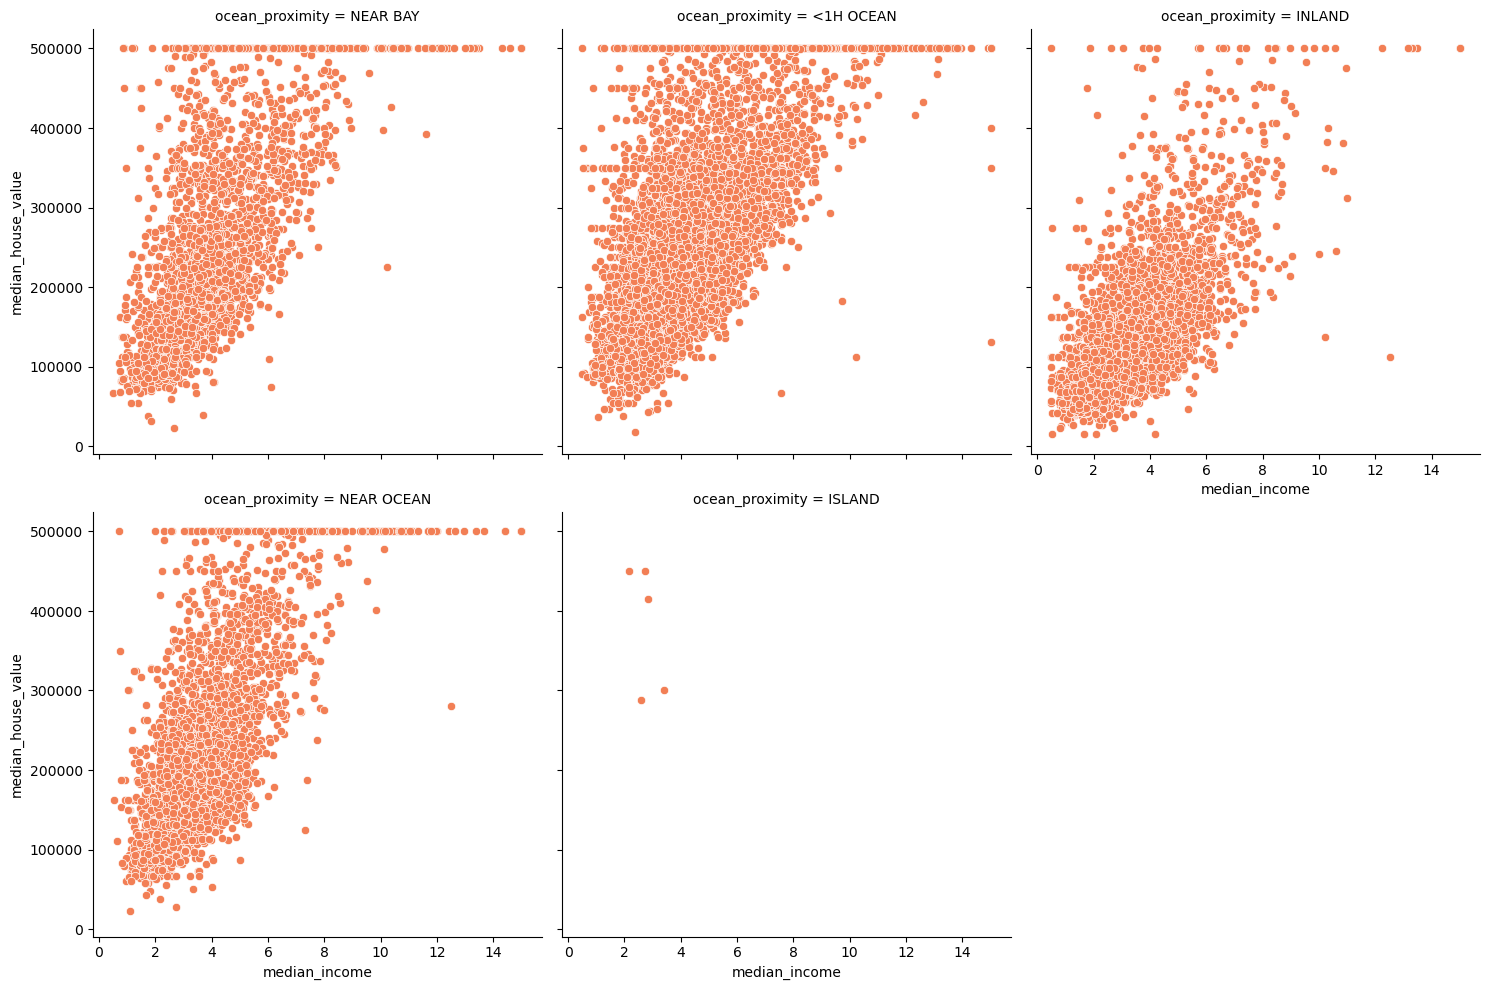

In [18]:
# Scatter plot between median_income and median_house_value at each ocean_proximity
sns.relplot(x="median_income",y='median_house_value',data=df_housing,col="ocean_proximity",col_wrap=3,color="#F27F55")

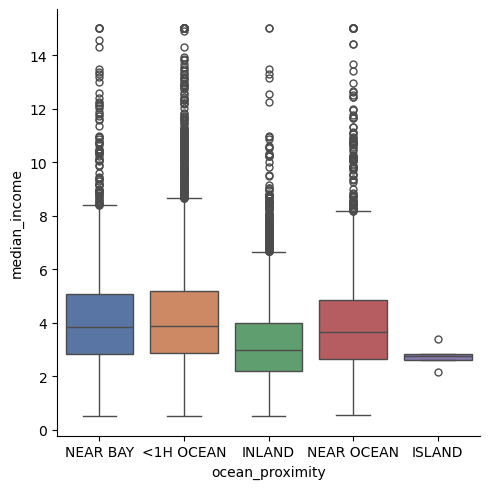

In [19]:
## Boxplot between ocean_proximity and median_income
sns.catplot(x='ocean_proximity', y="median_income", kind='box', data=df_housing, hue='ocean_proximity', palette='deep', legend=False)

# Comment

* > It seems that the Distribution of median_income is almost the same at ocean_proximity categories,
Also, it seems that the ISLAND median_income and median_house value is less than other categories and it makes
sense

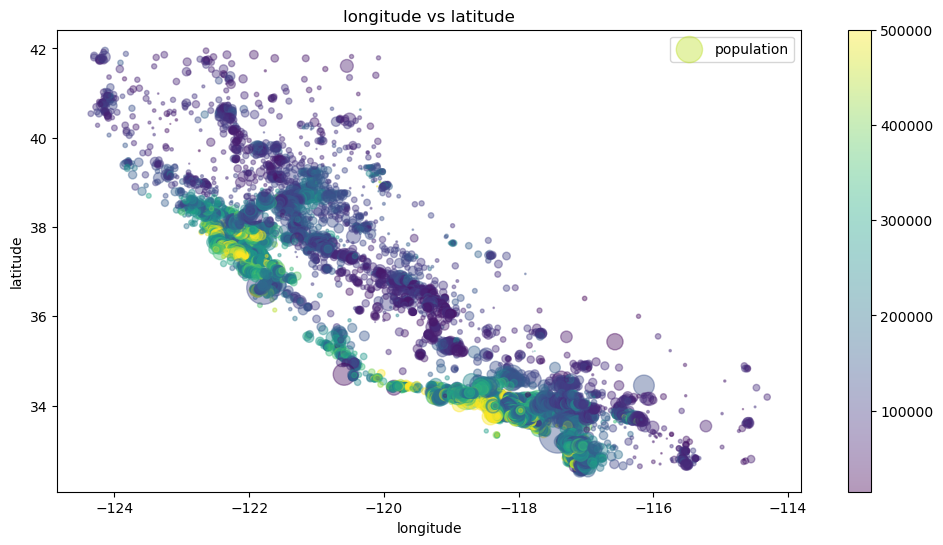

In [20]:
# Scatter plot between longitude and latitude
plt.figure(figsize=(12,6))
sc = plt.scatter(df_housing["longitude"],
                 df_housing["latitude"],
                 alpha=0.4,
                 cmap="viridis",
                 c=df_housing["median_house_value"],
                s=df_housing["population"]/50,
                label='population')
plt.colorbar(sc)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend()
plt.show()

# Comment

* > It seems that prices is higher near the ocean than the zones and these areas have higher population.

<b><font size="30" color='red'>Data Preprocessing</font></b>


# housing_median_age Column

<Axes: ylabel='housing_median_age'>

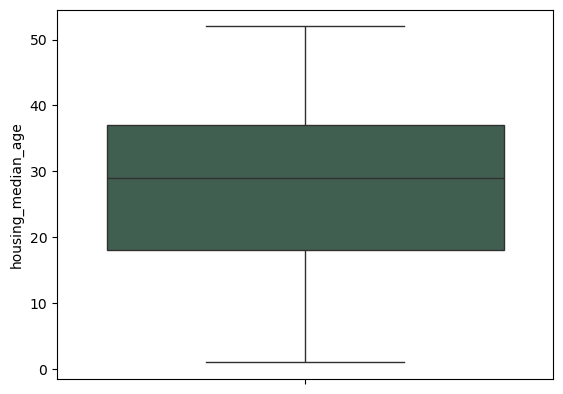

In [21]:
# Boxplot for the housing_median_age to check the outliers
sns.boxplot(y="housing_median_age",data=df_housing,color="#3C6451")

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

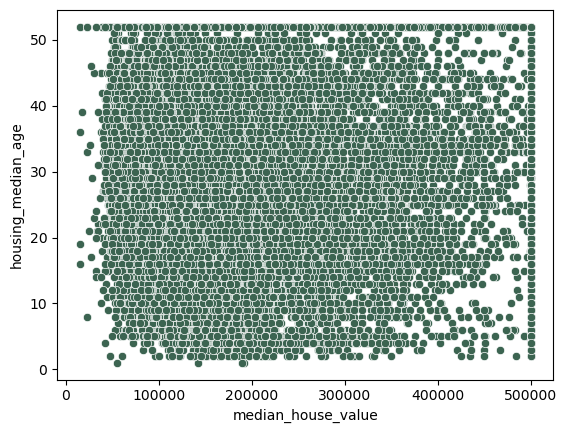

In [22]:
# scatterplot for the housing_median_age with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(x='median_house_value',y="housing_median_age",data=df_housing,color='#3C6451')

## total_bedrooms Column


<Axes: ylabel='total_bedrooms'>

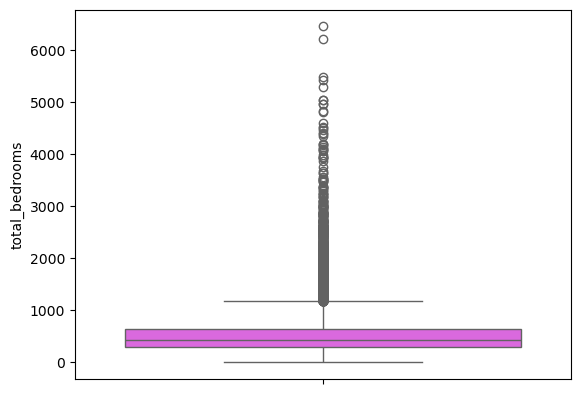

In [23]:
# Boxplot for the total_bedrooms to check the outliers
sns.boxplot(y="total_bedrooms",data=df_housing,color="#EC55F2")

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

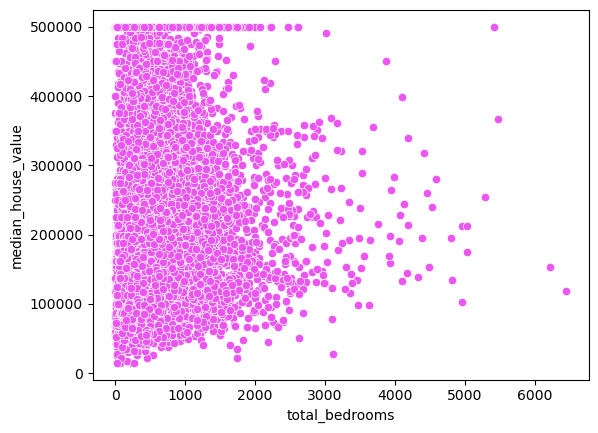

In [24]:
# scatterplot for the total_bedrooms with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="total_bedrooms",data=df_housing,color='#EC55F2')

In [25]:
# Fill the null values in total bedrooms column by random
Fill_total_bedrooms=df_housing["total_bedrooms"].dropna().unique()
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(pd.Series(np.random.choice(Fill_total_bedrooms,size=len(df_housing.index))))

In [26]:
# it seems from the scatter plot to delete from the total_bedrooms column the values higher than 5000 as outliers
df_housing = df_housing[df_housing["total_bedrooms"]<=5000]

##  households Column

<Axes: ylabel='households'>

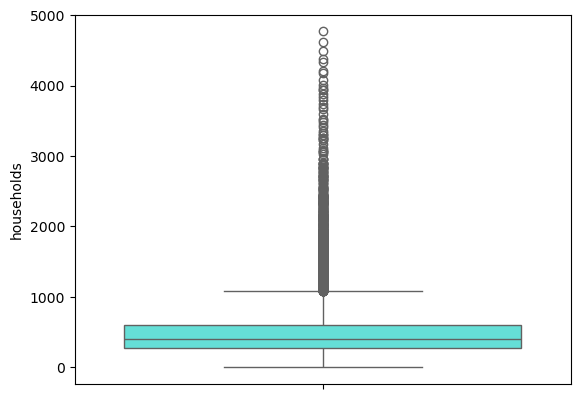

In [27]:
# Boxplot for the households to check the outliers
sns.boxplot(y="households",data=df_housing,color="#51F3E8")

<Axes: xlabel='households', ylabel='median_house_value'>

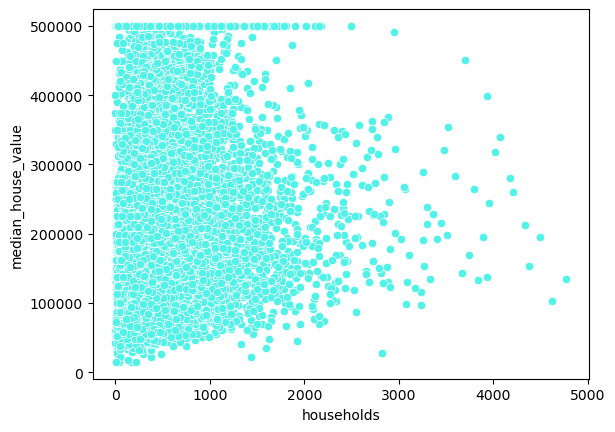

In [28]:
# scatterplot for the households with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="households",data=df_housing,color='#51F3E8')

In [29]:
# it seems from the scatter plot to delete from the households column the values higher than 4000 as outliers
df_housing = df_housing[df_housing["households"]<=4400]

##  population Column


<Axes: ylabel='population'>

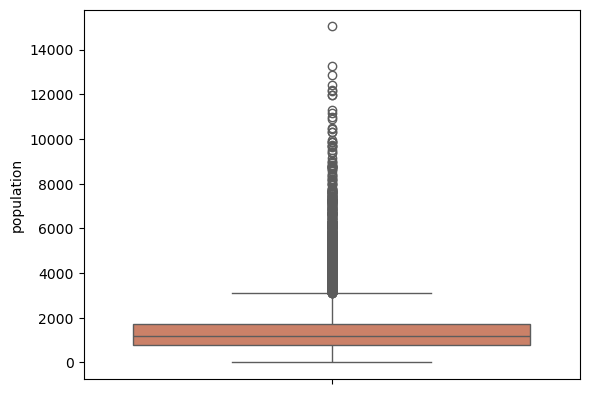

In [30]:
# Boxplot for the population to check the outliers
sns.boxplot(y="population",data=df_housing,color='#DB7958')

<Axes: xlabel='population', ylabel='median_house_value'>

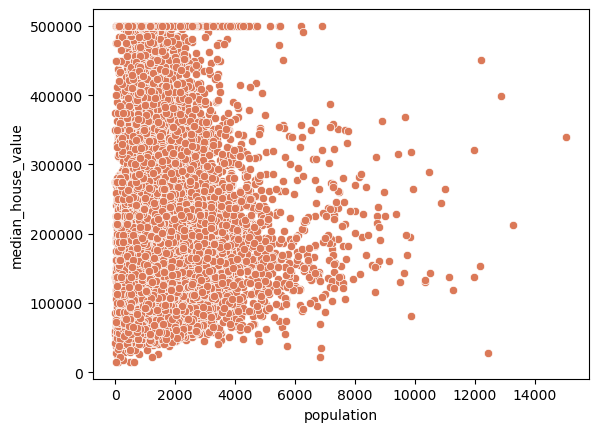

In [31]:
# scatterplot for the housing_median_age with population to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="population",data=df_housing,color='#DB7958')

In [32]:
# it seems from the scatter plot to delete from the population column the values higher than 10000 as outliers
df_housing = df_housing[df_housing["population"]<10000]

# median_income column

<Axes: ylabel='median_income'>

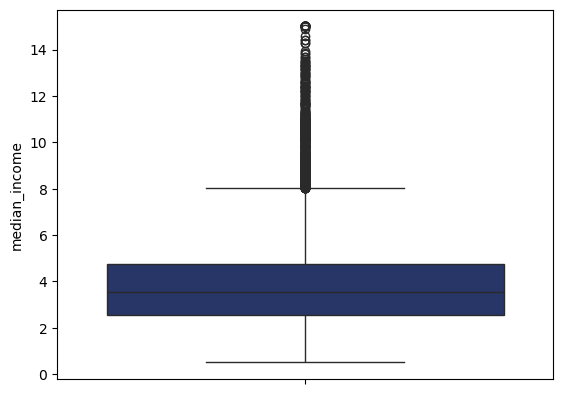

In [33]:
# Boxplot for the median_income to check the outliers
sns.boxplot(y="median_income",data=df_housing,color='#1D3070')

<Axes: xlabel='median_income', ylabel='median_house_value'>

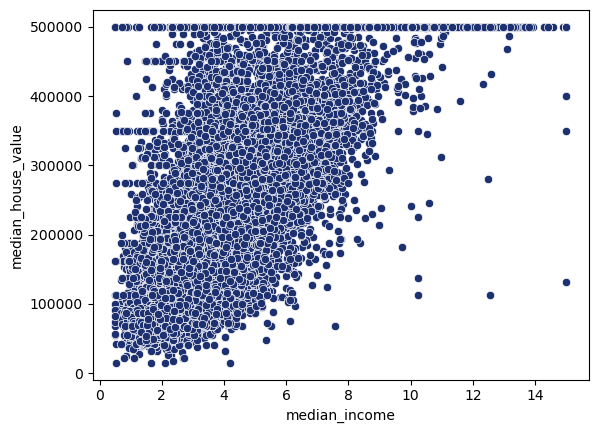

In [34]:
# scatterplot for the median_income with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="median_income",data=df_housing,color='#1D3070')

In [35]:
# it seems from the scatter plot to delete from the median_income column the values higher than 10 as outliers
df_housing = df_housing[df_housing["median_income"]<=12]

# ocean_proximity column

In [36]:
# covert the column ocean_proximity to numeric by labelencoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df_housing['ocean_proximity'] = l.fit_transform(df_housing['ocean_proximity'])

<b><font size="25" color='red'>Prediction Part</font></b>


 <b><font color='blue' size=6>Split data</font></b>

In [37]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
house = df_housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity',]]

In [39]:
# split the data to x and y
x = house.drop(["median_house_value"],axis=1).values
y= house['median_house_value'].values


<b><font color='blue' size=6>train test split</font></b>

In [40]:
# import the train_test_split
from sklearn.model_selection import train_test_split

In [41]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [42]:
# train_data = x_train.join(y_train)
# train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
# train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
# train_data['population'] = np.log(train_data['population'] + 1)
# train_data['households'] = np.log(train_data['households'] + 1)

# x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# test_data = x_test.join(y_test)
# test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
# test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
# test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
# test_data['population'] = np.log(test_data['population'] + 1)
# test_data['households'] = np.log(test_data['households'] + 1)

# x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

<b><font size="10" color='red'>Data scaling using robust regression</font></b>


In [43]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

<center><b><font size="8" color='red'>Linear regression model</font></b></center>


In [44]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
reg.score(x_train,y_train)

0.5773126799596181

In [46]:
reg.score(x_test,y_test)

0.5886447181094568

In [47]:
reg.intercept_

188626.30974157862

In [48]:
reg.coef_

array([ 36009.12564687, -42874.70289687,  45449.60787636, -36514.68169963,
        41520.38308913, 113898.05431   ,   3978.76585472])

In [49]:
pd.DataFrame(reg.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,36009.125647
total_rooms,-42874.702897
total_bedrooms,45449.607876
population,-36514.681700
households,41520.383089
median_income,113898.054310
median_house_value,3978.765855


In [50]:
y_pred_1 = reg.predict(x_test)

In [51]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [52]:
df_1.head()

,y_test,Y_pred
0,67500,137938.634063
1,291800,254695.257385
2,51000,76852.135459
3,82800,157430.907984
4,93200,92872.614140


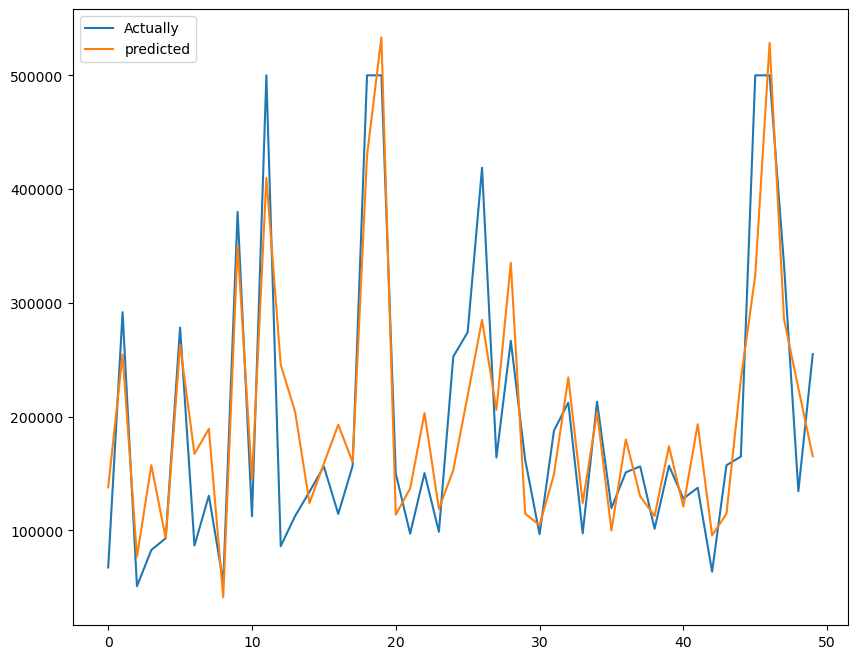

In [53]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Ridge Model</font></b></center>


In [132]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}


rid = linear_model.Ridge()
grid_search_ridge = GridSearchCV(rid, param_grid_ridge, cv=5)
grid_search_ridge.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [133]:
grid_search_ridge.best_params_['alpha']

10.0

In [134]:
best_ridge = linear_model.Ridge(alpha=10.0)
best_ridge.fit(x_train, y_train)

Ridge(alpha=10.0)

In [135]:
best_ridge.score(x_train,y_train)

0.5773086069041785

In [136]:
best_ridge.score(x_test,y_test)

0.5886282875433997

In [137]:
best_ridge.intercept_

188662.26035235918

In [138]:
best_ridge.coef_

array([ 35966.45791643, -42362.0129563 ,  44913.65556838, -36418.17739947,
        41442.40682673, 113617.21716539,   3982.31925424])

In [139]:
pd.DataFrame(best_ridge.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,35966.457916
total_rooms,-42362.012956
total_bedrooms,44913.655568
population,-36418.177399
households,41442.406827
median_income,113617.217165
median_house_value,3982.319254


In [140]:
y_pred_2 = best_ridge.predict(x_test)

In [141]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [142]:
df_2.head()

,y_test,Y_pred
0,67500,138160.594246
1,291800,254979.767550
2,51000,77159.930028
3,82800,157621.168417
4,93200,93277.787851


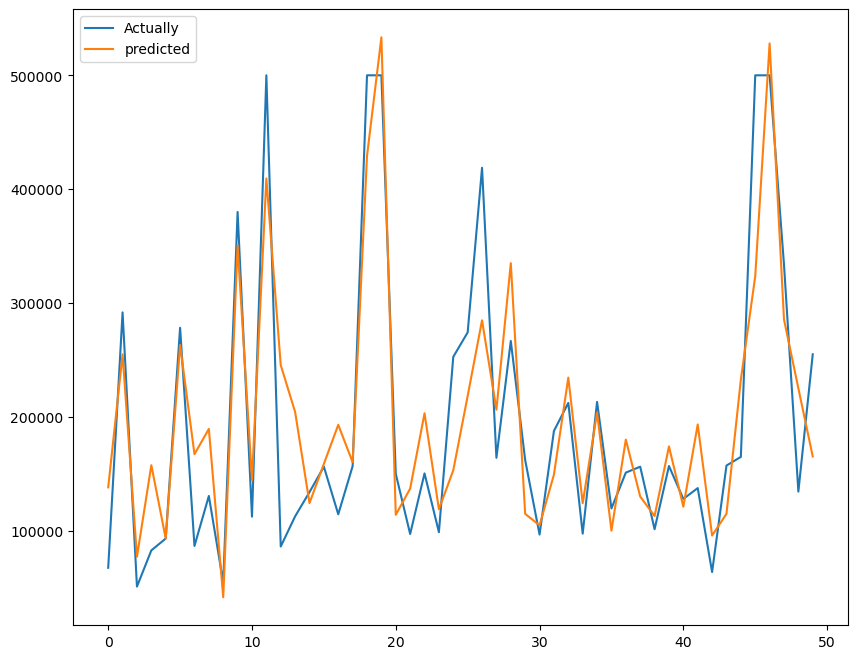

In [143]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Lasso Model</font></b></center>

In [144]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
lass = linear_model.Lasso()


grid_search_lasso = GridSearchCV(lass, param_grid_lasso, cv=5)
grid_search_lasso.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [145]:
grid_search_lasso.best_params_['alpha']

10.0

In [146]:
best_lasso = linear_model.Lasso(alpha=10.0)
best_lasso.fit(x_train, y_train)

Lasso(alpha=10.0)

In [147]:
best_lasso.score(x_train,y_train)

0.5773123083325844

In [148]:
best_lasso.score(x_test,y_test)

0.5886412106380167

In [149]:
best_lasso.intercept_

188634.48342147682

In [150]:
best_lasso.coef_

array([ 35992.64845665, -42731.16092195,  45325.12661009, -36456.84363318,
        41441.98416462, 113834.70639509,   3976.8747275 ])

In [151]:
pd.DataFrame(best_lasso.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,35992.648457
total_rooms,-42731.160922
total_bedrooms,45325.126610
population,-36456.843633
households,41441.984165
median_income,113834.706395
median_house_value,3976.874728


In [153]:
y_pred_3 = best_lasso.predict(x_test)

In [154]:
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_3})

In [155]:
df_3.head()

,y_test,Y_pred
0,67500,137973.825012
1,291800,254794.520347
2,51000,76924.511907
3,82800,157483.767333
4,93200,92988.166080


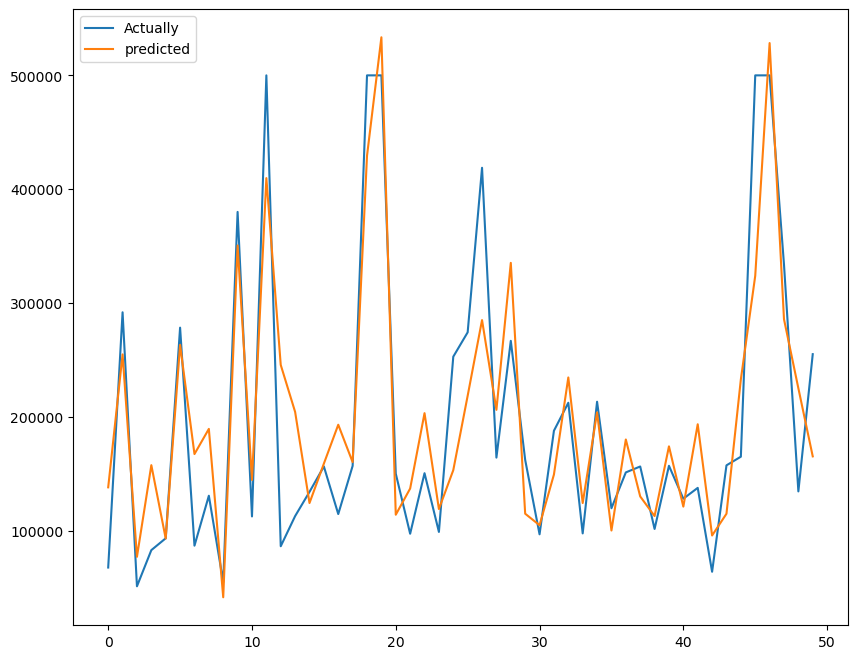

In [156]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Random Forest</font></b></center>

In [158]:
from sklearn.ensemble import RandomForestRegressor

best_forest = RandomForestRegressor(min_samples_split=4, n_estimators=300)

best_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [159]:
best_forest.score(x_train, y_train)

0.9471229696006763

In [160]:
best_forest.score(x_test, y_test)

0.7180047772426648

In [403]:
# Dont run this cell
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4 , 8]
}

grid_search = GridSearchCV(forest, param_grid,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [404]:
# Dont run this cell
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [ ]:
# Dont run this cell
grid_search.best_estimator_.score(x_train, y_train)

In [ ]:
# Dont run this cell
grid_search.best_estimator_.score(x_test, y_test)

In [162]:
y_pred_4 = best_forest.predict(x_test)

In [163]:
df_4 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_4})

In [164]:
df_4.head()

,y_test,Y_pred
0,67500,132836.175714
1,291800,307004.369435
2,51000,71502.304630
3,82800,126395.387722
4,93200,76892.274603


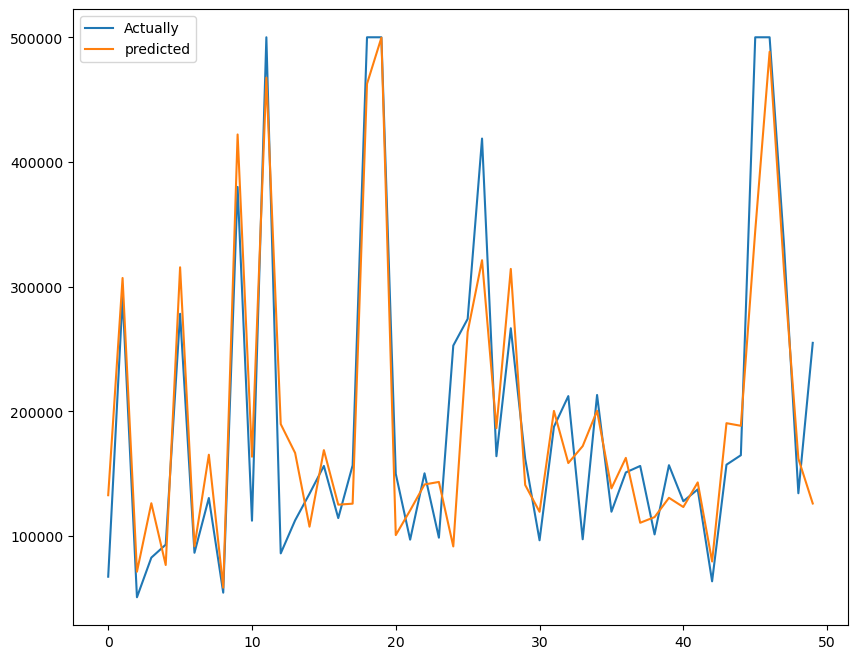

In [165]:
plt.figure(figsize=(10,8))
plt.plot(df_4[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Decision Tree</font></b></center>

In [ ]:
# Dont run this cell
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

grid_search_dtree = GridSearchCV(dtree, parameters,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search_dtree.fit(x_train, y_train)

In [ ]:
# Dont run this cell
grid_search_dtree.best_estimator_

In [210]:
from sklearn.tree import DecisionTreeRegressor
best_dtree = DecisionTreeRegressor(max_depth=5, max_features=1.0,
                      min_weight_fraction_leaf=0.1)

best_dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=1.0,
                      min_weight_fraction_leaf=0.1)

In [167]:
best_dtree.score(x_train, y_train)

0.5083142666822218

In [168]:
best_dtree.score(x_test, y_test)

0.5169724560295026

In [169]:
y_pred_5 = best_dtree.predict(x_test)

In [170]:
df_5 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_5})

In [171]:
df_5.head()

,y_test,Y_pred
0,67500,100473.485989
1,291800,379758.423313
2,51000,100473.485989
3,82800,142298.500536
4,93200,100473.485989


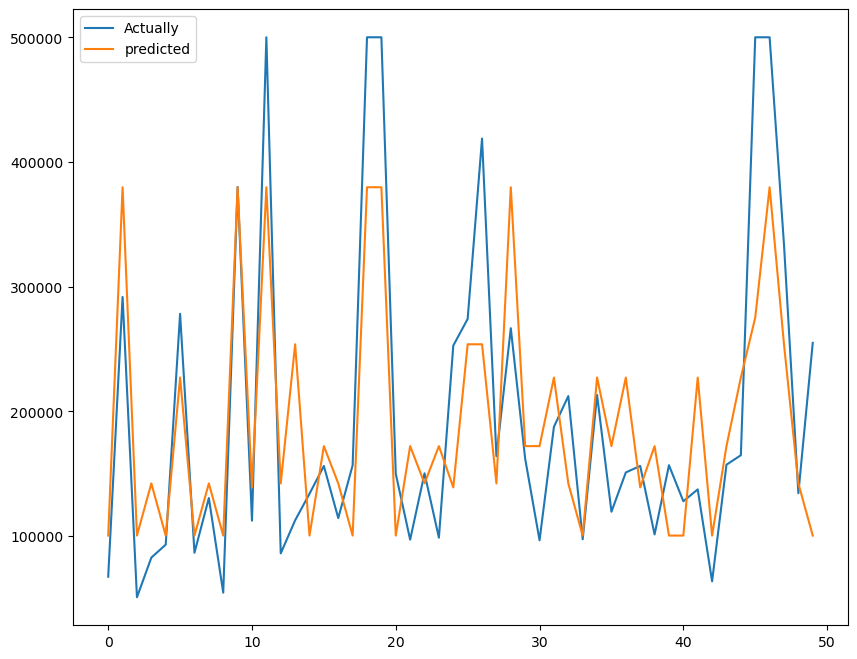

In [172]:
plt.figure(figsize=(10,8))
plt.plot(df_5[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Evaluating models</font></b></center>


<b><font size="5" color='blue'>Linear reg evaluation</font></b>


In [173]:
#import r2_score 
from sklearn.metrics import r2_score

In [174]:
# calculate r2_score for the model
reg_score = r2_score(y_test,y_pred_1)

In [175]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.5884672786854221

In [176]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < reg_score

True

In [177]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [178]:
# calculate mean_squared_error
mse = mean_squared_error(y_test , y_pred_1)
mse

5231462254.913285

In [179]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

53912.87658747746

In [180]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

0.34329559147088773

In [181]:
# calculate root_mean_squared_error
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

72328.84801317718


<b><font size="5" color='blue'>Ridge Evaluation</font></b>


In [182]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.5886282875433997

In [183]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.5884508410319875

In [184]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [185]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

5231671212.692457

In [186]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

53923.07991232525

In [187]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.3435000664209061

In [188]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

72328.84801317718


<b><font size="5" color='blue'>Lasso Evaluation</font></b>


In [189]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [190]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.5884637697010229

In [191]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [192]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

5231506861.620083

In [193]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

53915.135481731035

In [194]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

0.34333420942904525

In [195]:
# calculate root_mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(reg_mse)
lass_rmse

72328.84801317718

<b><font size="5" color='blue'>Random Forest Evaluation</font></b>

In [196]:
# calculate r2_score for the model
forest_score = r2_score(y_test,y_pred_4)

In [197]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-forest_score)*(n-1)/(n-p-1)
adj_r2

0.7178831376962449

In [198]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < forest_score

True

In [199]:
# calculate mean_squared_error
forest_mse = mean_squared_error(y_test , y_pred_4)
forest_mse

3586309520.910464

In [200]:
# calculate mean_absolute_percentage_error
forest_mape = mean_absolute_percentage_error(y_test , y_pred_4)
forest_mape

0.24910899072026427

In [201]:
# calculate root_mean_squared_error
forest_mse = mean_squared_error(y_test , y_pred_4)
forest_rmse = np.sqrt(reg_mse)
forest_rmse

72328.84801317718

<b><font size="5" color='blue'>Decision Tree Evaluation</font></b>

In [202]:
# calculate r2_score for the model
dtree_score = r2_score(y_test,y_pred_5)

In [203]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-dtree_score)*(n-1)/(n-p-1)
adj_r2

0.5167641005446744

In [204]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < dtree_score

True

In [205]:
# calculate mean_squared_error
dtree_mse = mean_squared_error(y_test , y_pred_5)
dtree_mse

6142963213.579238

In [206]:
# calculate mean_absolute_percentage_error
dtree_mape = mean_absolute_percentage_error(y_test , y_pred_5)
dtree_mape

0.3434073891329166

In [207]:
# calculate root_mean_squared_error
dtree_mse = mean_squared_error(y_test , y_pred_4)
dtree_rmse = np.sqrt(reg_mse)
dtree_rmse

72328.84801317718

<b><font size="20" color='red'>Comapring The Five Models</font></b>


In [208]:
models = ["Linear","Ridge","Lasso","Forest","DTree"]
data = [[reg_score,reg_mse],[rid_score,rid_mse],[lass_score,lass_mse],[forest_score, forest_mse],[dtree_score, dtree_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Forest,0.718005,3.586310e+09
Linear,0.588645,5.231462e+09
Lasso,0.588641,5.231507e+09
Ridge,0.588628,5.231671e+09
DTree,0.516972,3.586310e+09


# Comment


- Based on the provided results for different regression models, the Random Forest model has the highest R^2 score, indicating better predictive performance compared to the other models. The RMSE (Root Mean Squared Error) is a measure of the average prediction error, and a lower RMSE is better, so the Random Forest model is better than the remain models. 